In [6]:
#install.packages("IntroCompFinR")
#install.packages("lubridate")
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpuAWbTu/downloaded_packages


In [7]:
library(rcompanion)
library(readxl)
library(ggplot2)
#library(IntroCompFinR)
library(methods)
library(dplyr)
library(lubridate)
library(corrplot)
library(gmodels)
library(matrixStats)
library(scales)

corrplot 0.92 loaded

Registered S3 method overwritten by 'gdata':
  method         from     
  reorder.factor DescTools


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count




In [8]:
GoldmanSachs = read_xlsx("../Excel Master Data Sets/GS Master.xlsx")
MorganStanley = read_xlsx("../Excel Master Data Sets/MS Master.xlsx")
Schwab = read_xlsx("../Excel Master Data Sets/SCHW Master.xlsx")

In [9]:
GoldmanSachs$Day <- lubridate::day(GoldmanSachs$Date)
GoldmanSachs$Month <- lubridate::month(GoldmanSachs$Date)
GoldmanSachs$Year <- lubridate::year(GoldmanSachs$Date)
MorganStanley$Day <- lubridate::day(MorganStanley$Date)
MorganStanley$Month <- lubridate::month(MorganStanley$Date)
MorganStanley$Year <- lubridate::year(MorganStanley$Date)
Schwab$Day <- lubridate::day(Schwab$Date)
Schwab$Month <- lubridate::month(Schwab$Date)
Schwab$Year <- lubridate::year(Schwab$Date)

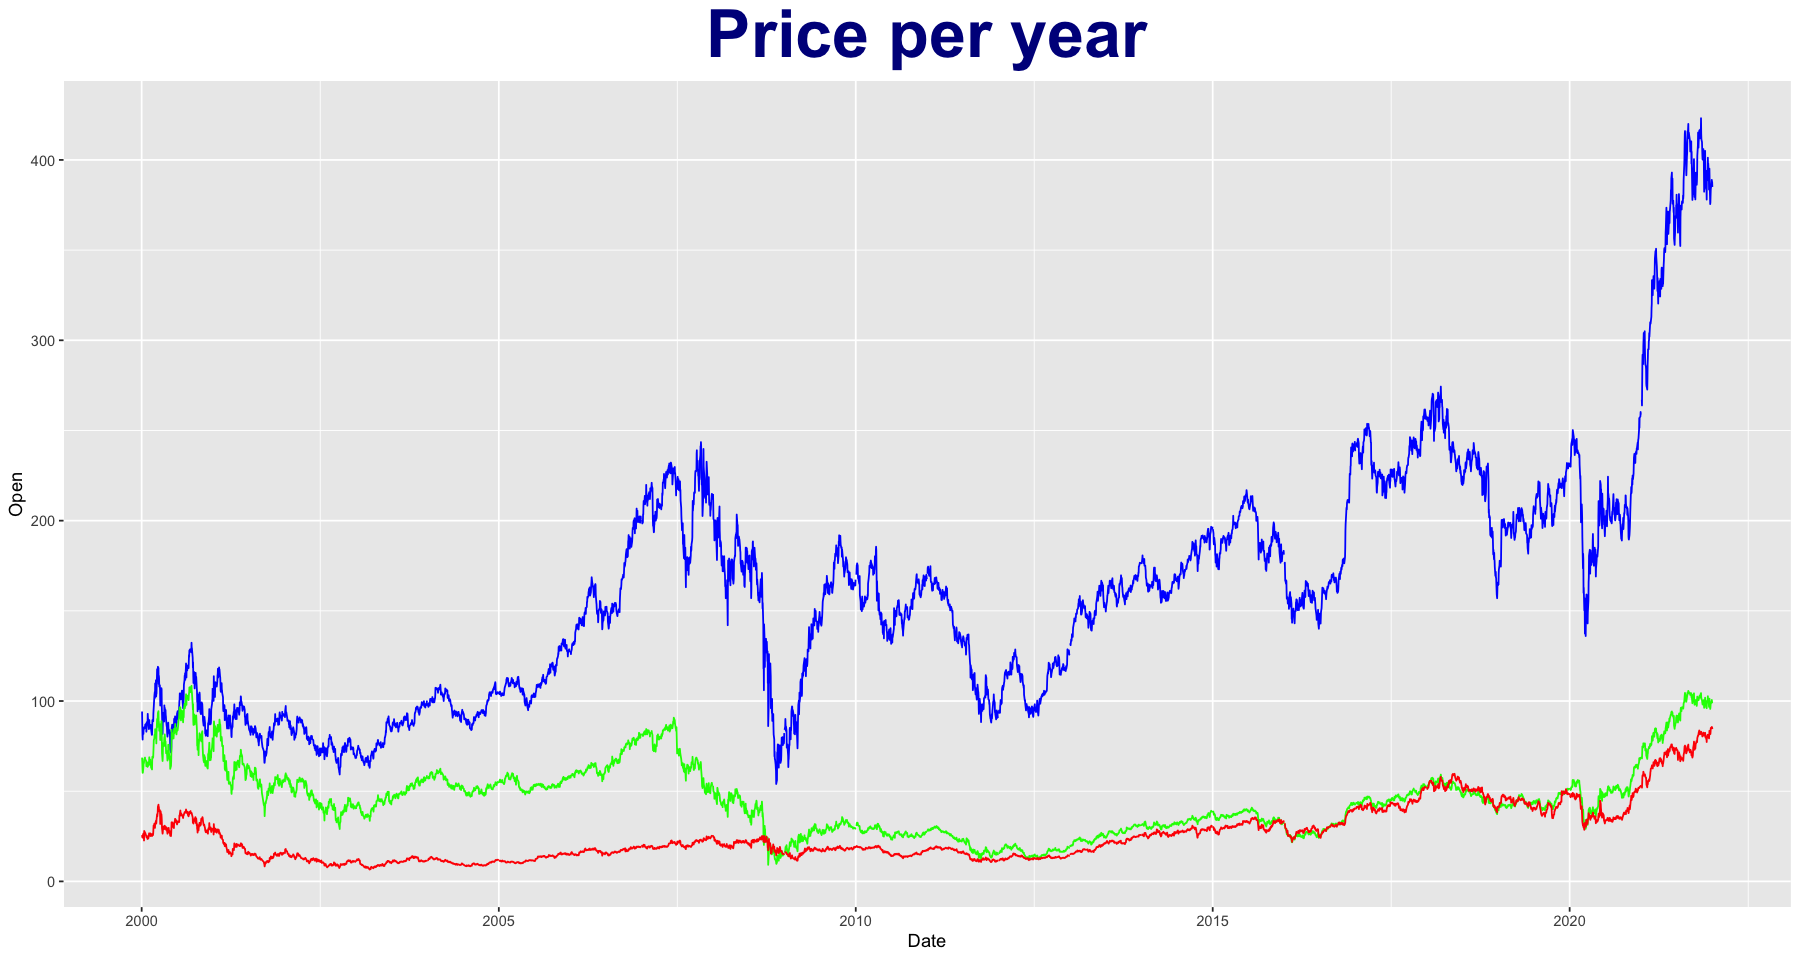

In [10]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot() +
  geom_line(data = GoldmanSachs, aes(x = Date, y = Open, group = Year), color = "blue") + # must include argument label "data"
  geom_line(data = MorganStanley, aes(x = Date, y = Open, group = Year), color = "green") +
  geom_line(data = Schwab, aes(x = Date, y = Open, group = Year), color = "red") +
  ggtitle("Price per year") +
  theme(plot.title = element_text(size = 40, face = "bold", color="darkblue", hjust=0.5))

In [11]:
GoldmanSachsYear = aggregate(Open ~ Year, data = GoldmanSachs, FUN = sum)
MorganStanleyYear = aggregate(Open ~ Year, data = MorganStanley, FUN = sum)
SchwabYear = aggregate(Open ~ Year, data = Schwab, FUN = sum)

NULL

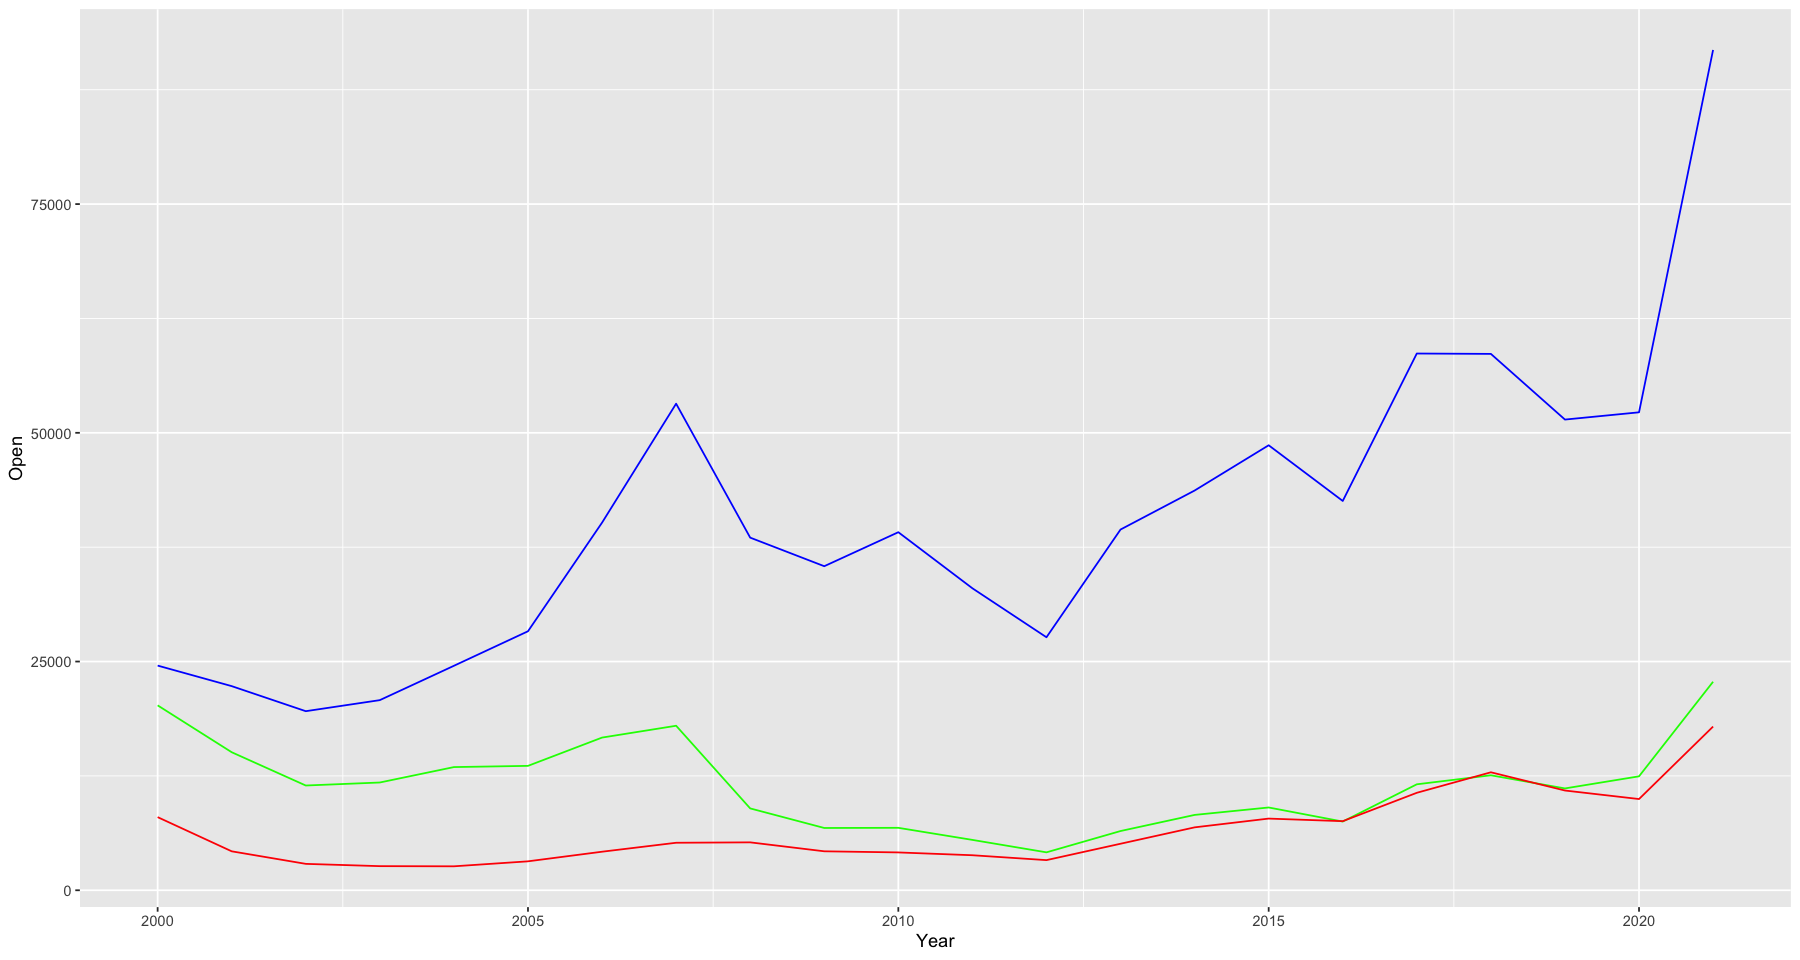

In [12]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot() + 
  geom_line(data = GoldmanSachsYear, aes(x = Year, y = Open), color = "blue") +
  geom_line(data = MorganStanleyYear, aes(x = Year, y = Open), color = "green") +
  geom_line(data = SchwabYear, aes(x = Year, y = Open), color = "red")
  ggtitle("Price by Year") +
  theme(plot.title = element_text(size = 40, face = "bold", color="darkblue", hjust=0.5))

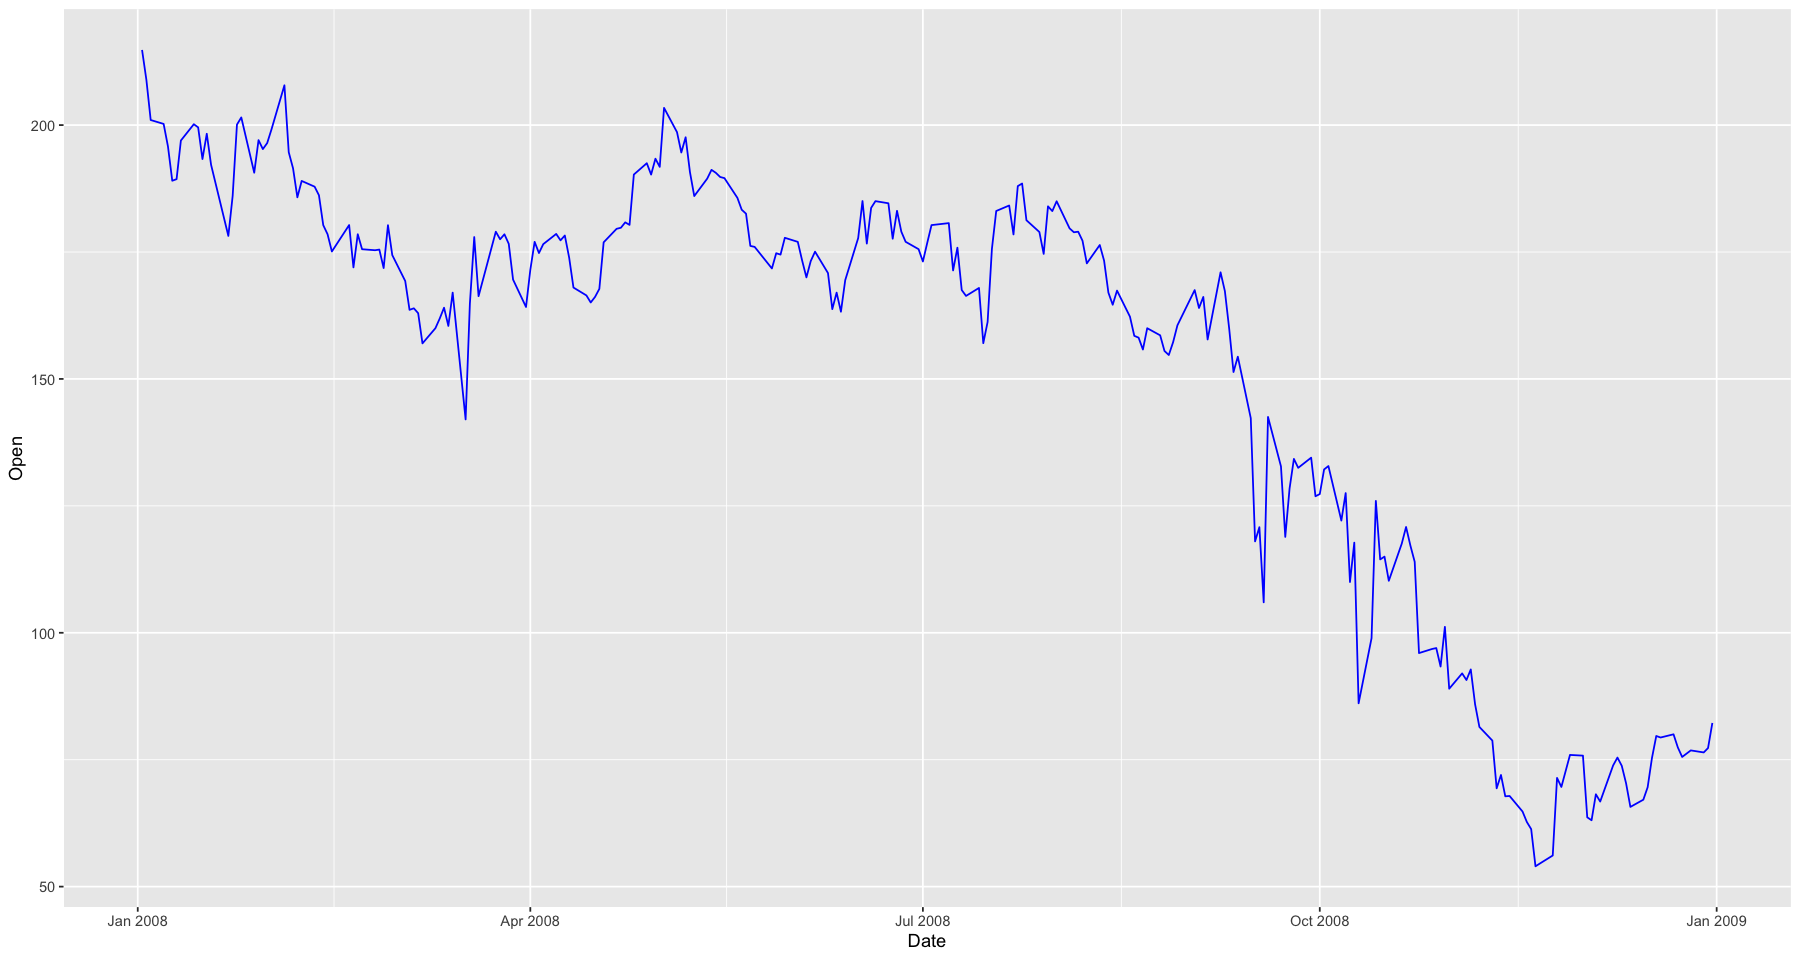

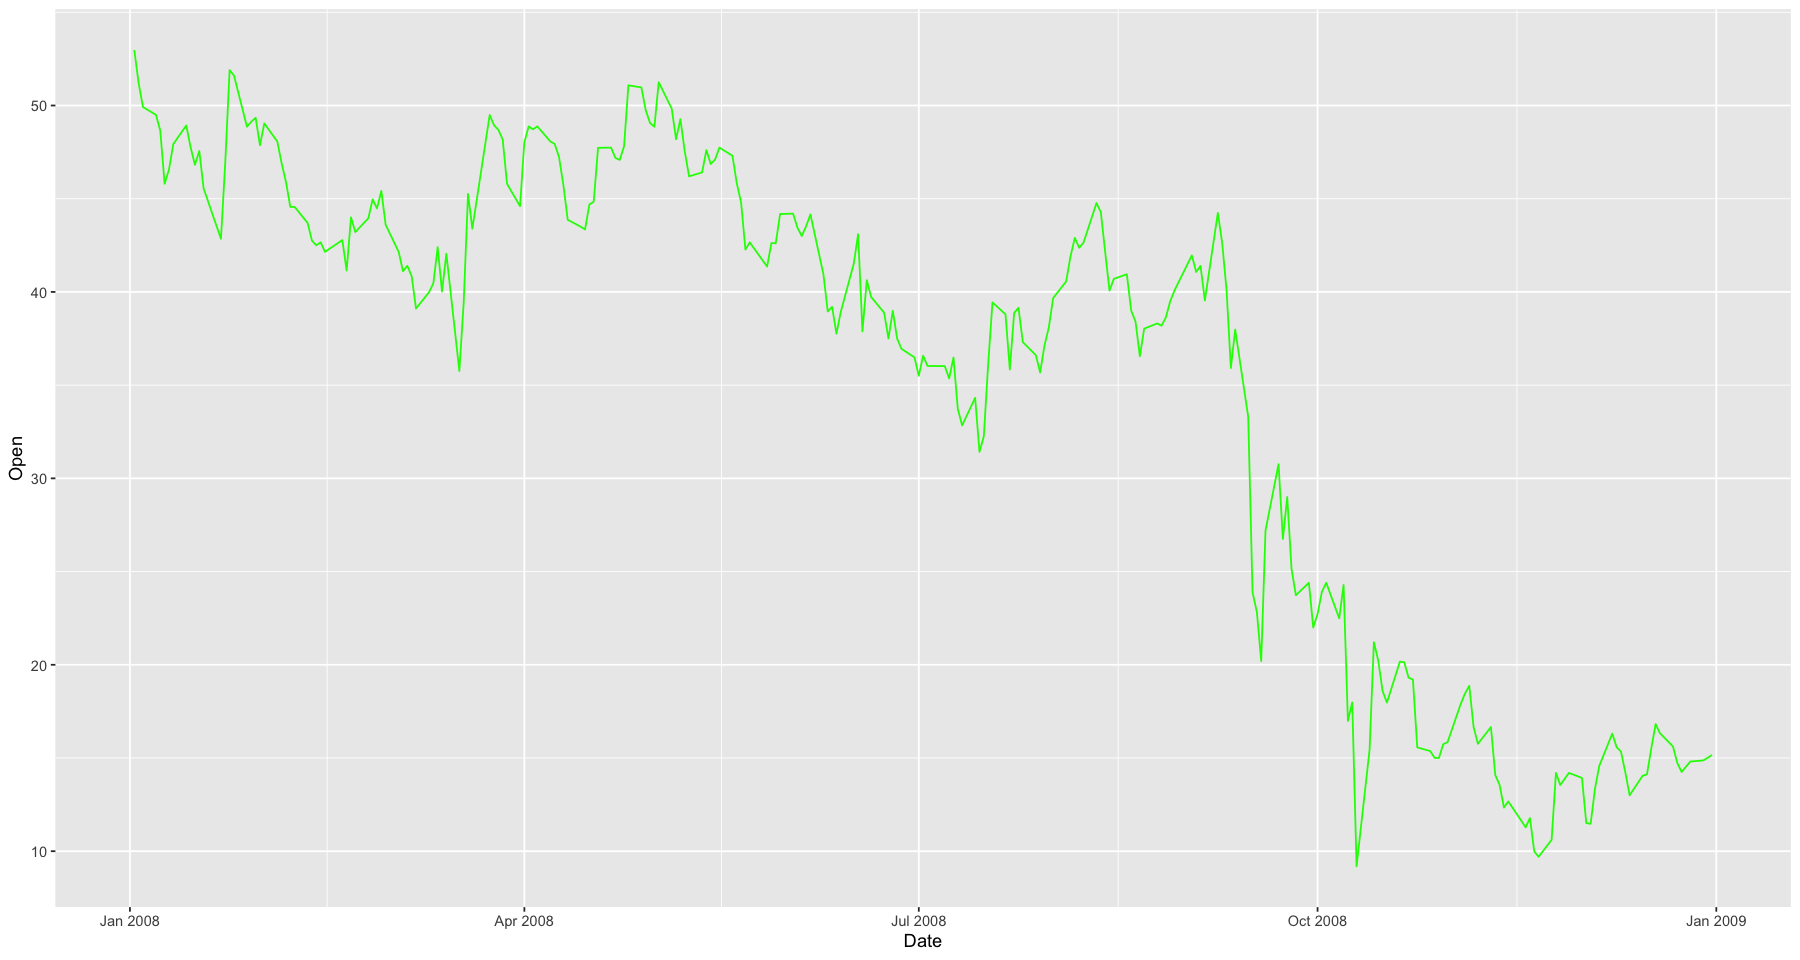

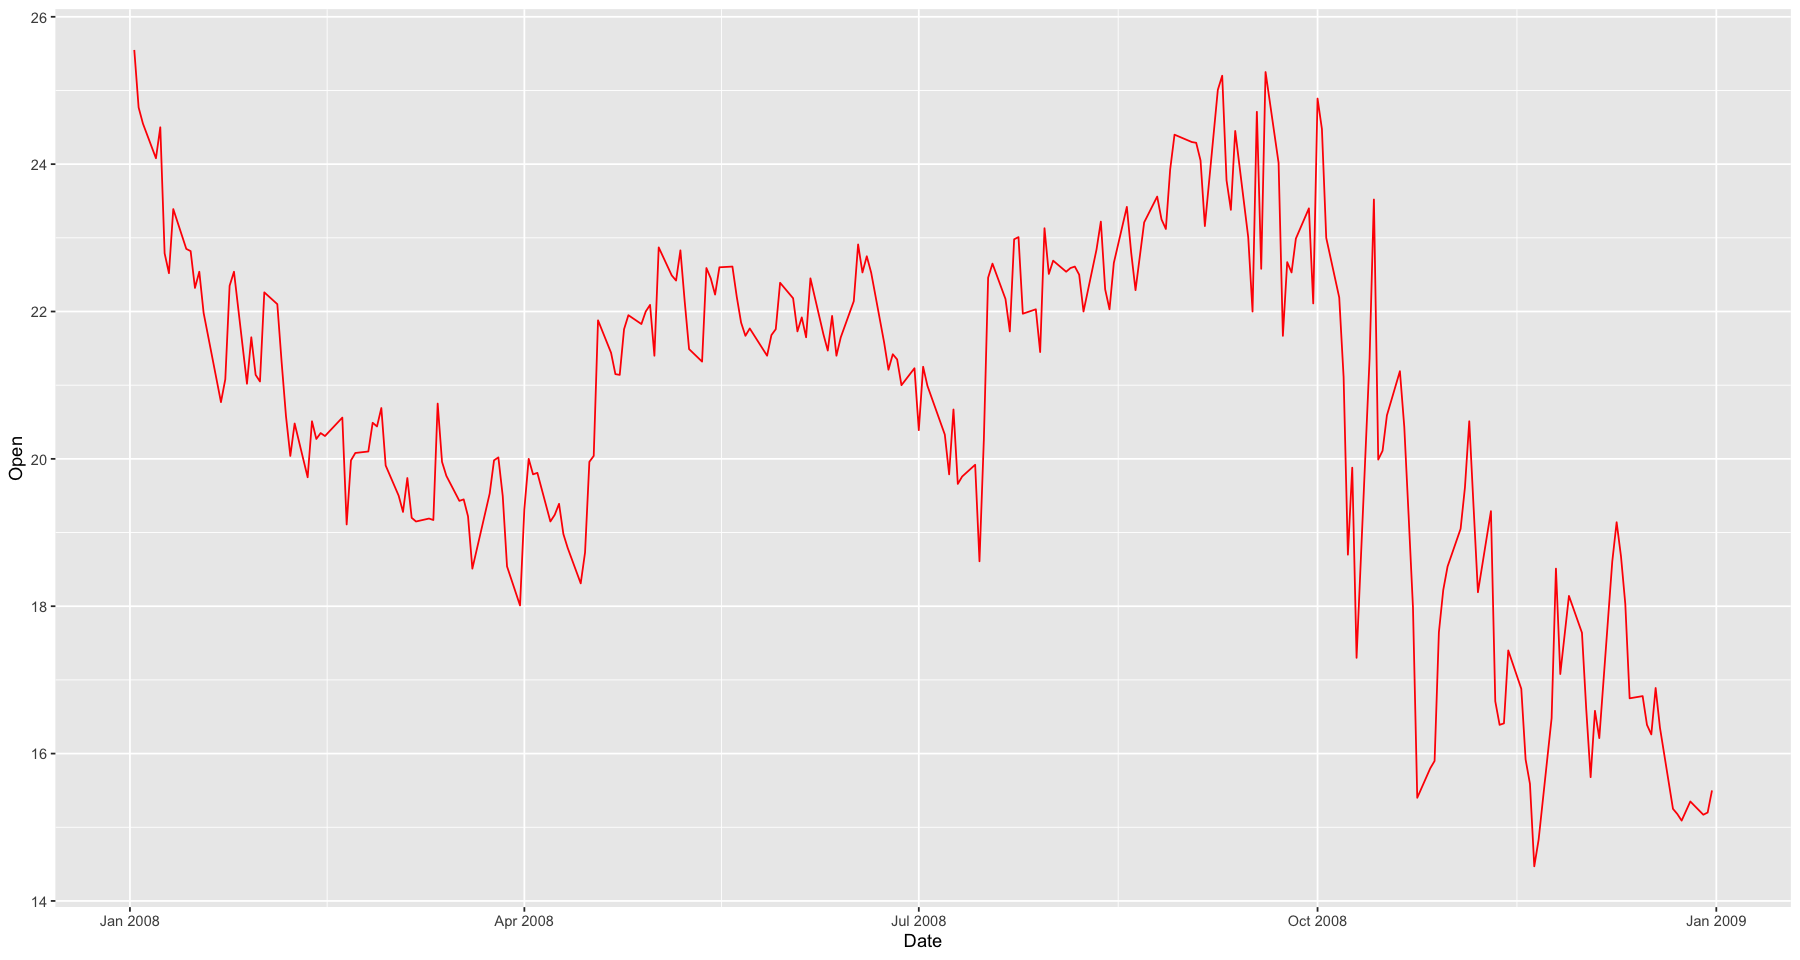

In [13]:
GoldmanSachs %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Open, group = Year)) +
  geom_line(color = "blue")

MorganStanley %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Open, group = Year)) +
  geom_line(color = "green")

Schwab %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Open, group = Year)) +
  geom_line(color = "red")

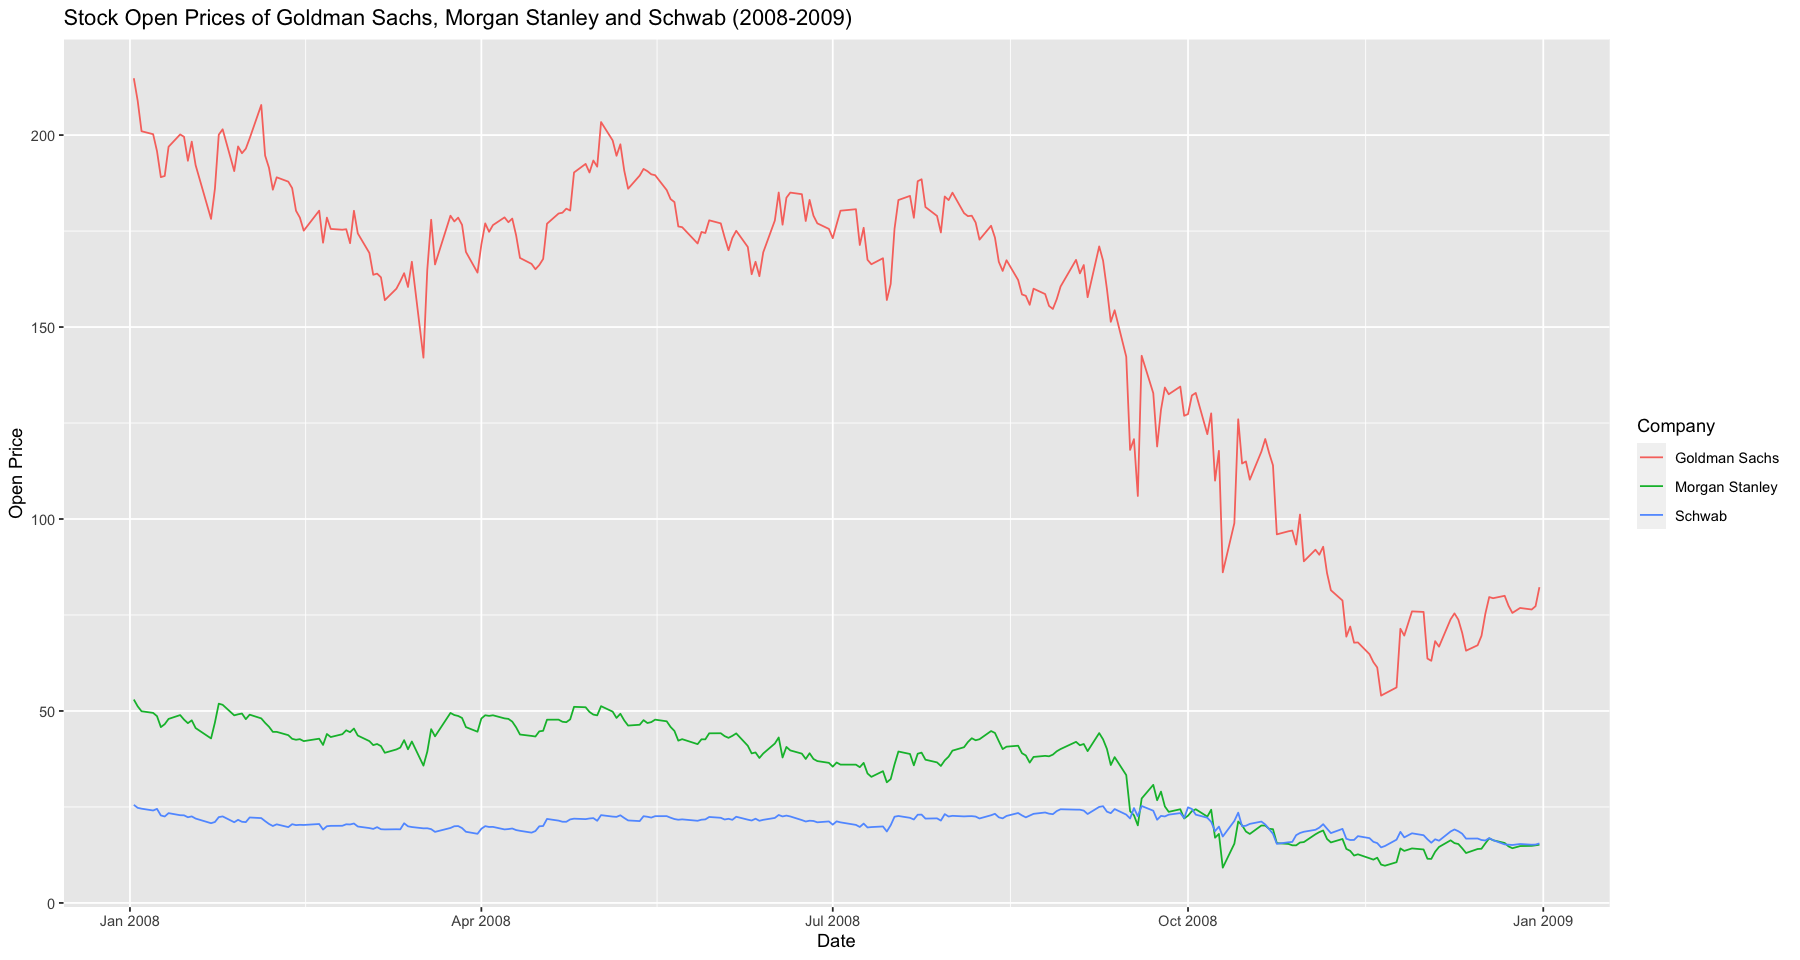

In [18]:
library(dplyr)
library(ggplot2)

goldman_df <- GoldmanSachs %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  mutate(Company = "Goldman Sachs")

morgan_df <- MorganStanley %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  mutate(Company = "Morgan Stanley")

schwab_df <- Schwab %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  mutate(Company = "Schwab")

combined_df <- bind_rows(goldman_df, morgan_df, schwab_df)

ggplot(combined_df, aes(x = Date, y = Open, group = interaction(Company, Year), color = Company)) +
  geom_line() +
  labs(title = "Stock Open Prices of Goldman Sachs, Morgan Stanley and Schwab (2008-2009)",
       x = "Date", y = "Open Price")


In [14]:
startTime <- as.Date("2008-01-01")
endTime <- as.Date("2009-01-01")

start.end <- c(startTime,endTime)
start.end

[1] "2008-01-01" "2009-01-01"

In [15]:
startTime <- as.Date("2008-01-01")
endTime <- as.Date("2009-01-01")

start.end <- c(startTime,endTime)
start.end

[1] "2008-01-01" "2009-01-01"

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Cannot add [34m<ggproto>[39m objects together
[36mℹ[39m Did you forget to add this object to a [34m<ggplot>[39m object?


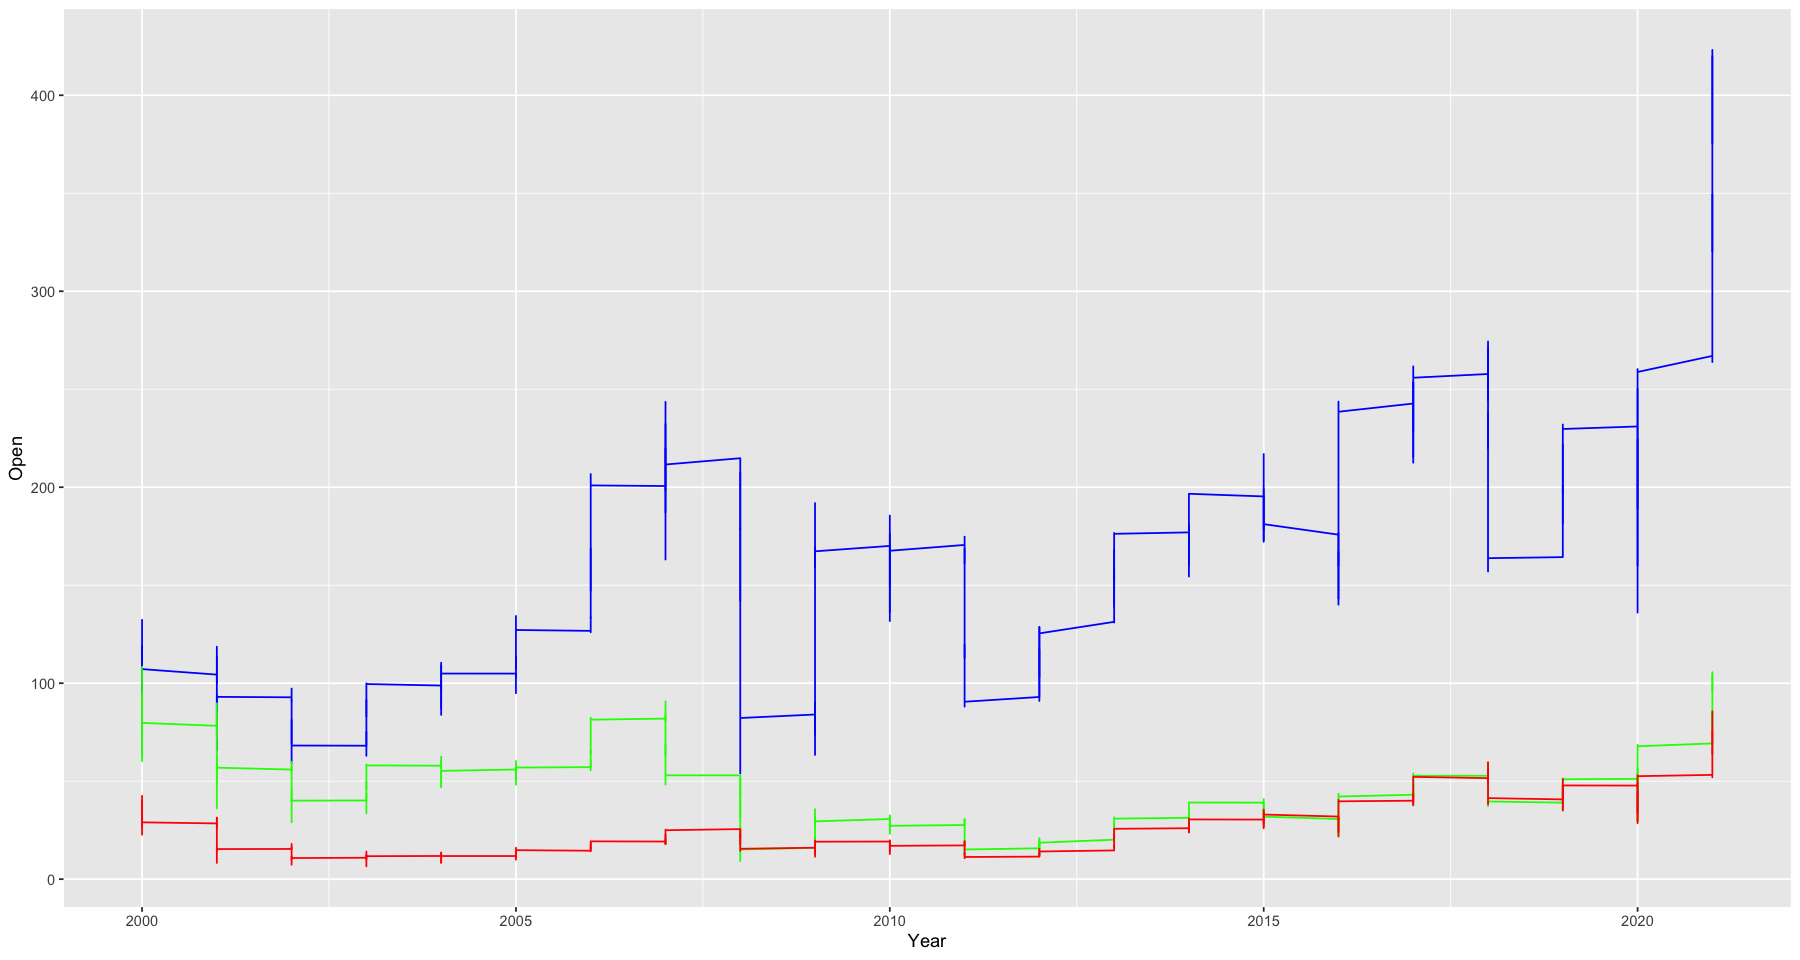

In [16]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot() + 
  geom_line(data = GoldmanSachs, aes(x = Year, y = Open), color = "blue") +
  geom_line(data = MorganStanley, aes(x = Year, y = Open), color = "green") +
  geom_line(data = Schwab, aes(x = Year, y = Open), color = "red")
  scale_x_date(limits=start.end, breaks=date_breaks("1 year"), labels=date_format("%b %y")) +
  xlim("Date") +
  ylim("Open") +
  ggtitle("Price by Year") +
  theme(plot.title = element_text(size = 40, face = "bold", color="darkblue", hjust=0.5)) 

In [17]:
startTime <- as.Date("2008-01-01")
endTime <- as.Date("2009-01-01")

start.end <- c(startTime, endTime)

options(repr.plot.width=15, repr.plot.height=8)

ggplot() + 
  geom_line(data = GoldmanSachs, aes(x = Date, y = Open), color = "blue") +
  geom_line(data = MorganStanley, aes(x = Date, y = Open), color = "green") +
  geom_line(data = Schwab, aes(x = Date, y = Open), color = "red") +
  ggtitle("Price by Year") +
  scale_x_date(limits = start.end, breaks = date_breaks("1 year"), labels = date_format("%b %y")) +
  theme(plot.title = element_text(size = 40, face = "bold", color = "darkblue", hjust = 0.5))

ERROR while rich displaying an object: Error: Invalid input: date_trans works with objects of class Date only

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(cap

ERROR while rich displaying an object: Error: Invalid input: date_trans works with objects of class Date only

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(cap

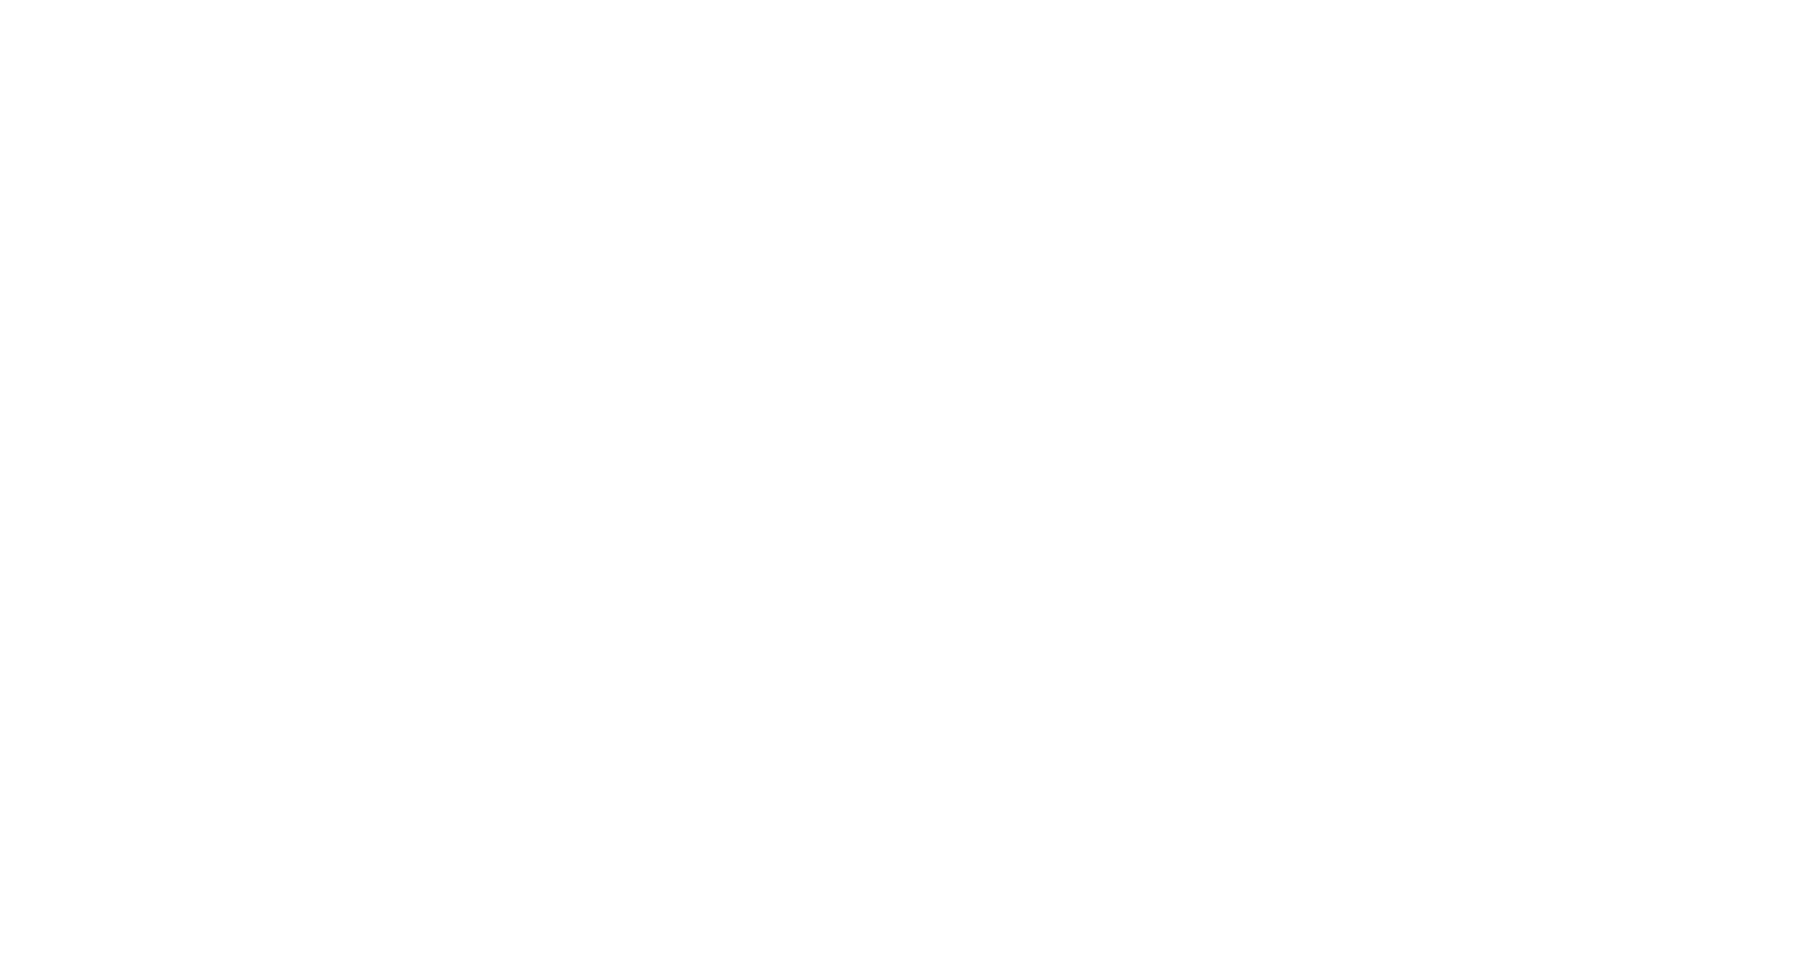

In [79]:
start.end <- c(as.Date("2008-01-01"), as.Date("2008-12-31"))
options(repr.plot.width=15, repr.plot.height=8)

ggplot() + 
  geom_line(data = GoldmanSachs, aes(x = Date, y = Open, group = Year), color = "blue") +
  geom_line(data = MorganStanley, aes(x = Date, y = Open, group = Year), color = "green") +
  geom_line(data = Schwab, aes(x = Date, y = Open, group = Year), color = "red") +
  scale_x_date(limits = start.end, breaks = date_breaks("1 month"), labels = date_format("%b %d")) +
  ggtitle("Price by Year") +
  theme(plot.title = element_text(size = 40, face = "bold", color = "darkblue", hjust = 0.5))